<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/lab/lab4/Laborator_4-Skel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boosting
=======

* Mihai Trăscău, 2020

## 1. Objectif du Laboratoire
Ce laboratoire revisite le thème de l'apprentissage d'ensemble ( _ensemble learning_ ),  en mettant l'accent sur les concepts de **boosting**.

Le **boosting** est un méta-algorithme qui, comme les autres méthodes d'apprentissage d'ensemble, repose sur la construction d'un classificateur *fort* en utilisant une série de classificateurs *faibles* (en anglais, weak/base learner) qui "décident ensemble".

L'autre classe principale de méthodes d'ensemble est le **bagging**, dont l'algorithme exponentiel est *RandomForest*, qui a été étudié précédemment.

En général, le boosting permet d'utiliser n'importe quel type de classificateur faible.

Contrairement aux algorithmes de type bagging (où les instances de classificateurs faibles sont entraînées indépendamment), dans le boosting, chaque instance de weak learner est entraînée et ajoutée à l'ensemble de manière itérative (voir aussi la figure ci-dessous).


<div>
<img src="./boosting.png" width="700"/>
</div>

## 2. Notions théoriques sur le Boosting

### 2.1. AdaBoost

* *AdaBoost* est parmi les premières méthodes de boosting proposées \[1]\[2] qui a produit de bons résultats. Elle repose sur l'entraînement d'un ensemble de classificateurs pour lesquels l'hypothèse de l'ensemble (la prédiction), $H_{T}(x)$, est donnée par la formule

    $$H_{T}(x) = \sum_{t=1}^{T}\rho_{t}h_{t}(x)$$

    où $x$ représente les données d'entrée, $h_{t}(x)$ est l'hypothèse de chaque classificateur faible dans l'ensemble et $\rho_{t}$ est le poids avec lequel il "participe" à la décision.

    À chaque étape $t$ de l'entraînement, un nouveau classificateur faible (qui produit l'hypothèse $h_{t}(x)$) est ajouté. Pour mieux informer chaque classificateur faible qui sera ajouté ultérieurement, AdaBoost repose sur l'ajout de poids pour les éléments de l'ensemble de données. Après chaque étape, l'ensemble de données d'entraînement est repondéré de sorte que les exemples "difficiles" jusqu'à l'étape $t$ deviennent "prioritaires" pour être correctement classifiés à partir de l'étape $t+1$.

    Autrement dit, à chaque étape, le classificateur avec l'hypothèse $h_{t}$ qui minimise l'erreur totale pondérée

    $$q_{i}^{(T-1)} = \sum_{y_{i}\neq h_{t}(x_{i})}e^{-y_{i}H_{T-1}(x_{i})}$$

    pour laquelle nous pouvons calculer les taux d'erreur

    $$\epsilon_{t} = \frac{\sum_{y_{i}\neq h_{t}(x_{i})} q_{i}^{(T-1)}}{\sum_{i=1}^{N} q_{i}^{(T-1)}}$$

    Ainsi, nous pouvons déterminer le poids du nouveau classificateur comme étant

    $$\rho_{t} = \frac{1}{2}ln(\frac{1-\epsilon_{t}}{\epsilon_{t}})$$

    ce qui nous permet de formuler $H_{T} = H_{T-1} + \rho_{t}h_{t}$

### 2.2. Gradient Boosting

#### A. Régression

* Tout comme AdaBoost, la méthode Gradient Boosting entraîne des classificateurs (régresseurs) faibles qu'elle ajoute à l'ensemble. Cependant, contrairement à AdaBoost, les exemples de l'ensemble d'entraînement pour lesquels des valeurs erronées sont prédites ne reçoivent pas plus d'"importance". Au lieu de cela, elle repose sur le calcul des *valeurs résiduelles* pour chaque exemple.

    Supposons qu'à l'étape $t$ nous avons l'hypothèse $H_{T-1}$ que nous voulons améliorer en ajoutant un nouveau classificateur (régresseur). Ainsi, la prédiction $y_{i}$ pour chaque exemple donné $x_{i}$ deviendra

    $$H_{T-1}(x_{i}) + h_{t}(x_{i}) = y_{i}$$

    ou de manière équivalente, nous considérons que nous devons trouver ce classificateur (régresseur) pour lequel

    $$h_{t}(x_{i}) = y_{i} - H_{T-1}$$

    Comme la recherche exacte de $h_{t}$ n'est pas possible, nous allons calculer une approximation. Ainsi, nous allons générer les paires $(x_{i}, y_{i} - F_{T-1}(x_{i}))$. L'ensemble formé des paires de données d'entrée et de valeurs résiduelles sera utilisé pour entraîner un nouveau classificateur (régresseur), qui, par sa prédiction, tente de minimiser l'erreur globale de prédiction.

#### B. Classification (multi-classe)

* Gradient Boosting appliqué aux problèmes de classification apporte une série de modifications. Tout d'abord, au lieu d'une valeur (régression), l'ensemble doit prédire la classe $C_{k}$ à laquelle appartient l'exemple $x_{i}$. Pour ce faire, nous allons générer $N$ hypothèses correspondant aux probabilités d'appartenance à chacune des $N$ classes

    $$P(C_{k}|x_{i}) = \frac{e^{H_{T}^{C_{k}}(x_{i})}}{\sum_{m=1}^{N}e^{H_{T}^{C_{m}}(x_{i})}}$$

    où la probabilité $P(C_{k}|x_{i})$ la plus élevée indique la prédiction de la classe $k$. Ainsi, le problème se réduit à minimiser la divergence de Kullback-Leibler entre la distribution de probabilités prédite et la distribution réelle. Pour ce faire, nous allons entraîner un nouveau classificateur sur les valeurs résiduelles de l'hypothèse pour chaque classe. C'est-à-dire que nous allons obtenir un nouveau $h_{t}^{C_{k}}$, en réalisant ensuite l'ensemble défini par $H_{T}^{C_{k}} = H_{T-1}^{C_{k}} + h_{t}^{C_{k}}$ où $k={1,...,N}$

<a id='cerinte-1'></a>

## 3. Exigences (Partie I) \[8p]

Les algorithmes suivants seront entraînés pour être comparés pour la **classification** :

* Arbre de décision
* Random Forest
* AdaBoost
* Gradient Boosting

Suivez le squelette de code ci-dessous et complétez avec du code là où cela est indiqué. Il est recommandé d'utiliser la bibliothèque **scikit-learn** où vous trouverez tous les modèles décrits ci-dessus, ainsi que des méthodes d'entraînement et de test.


In [3]:
#!pip install scikit-learn
#!pip install matplotlib

In [4]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [5]:
# TODO 0 - import de modele din sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score



Text(0.5, 0, 'Number of Trees (for ensembles)')

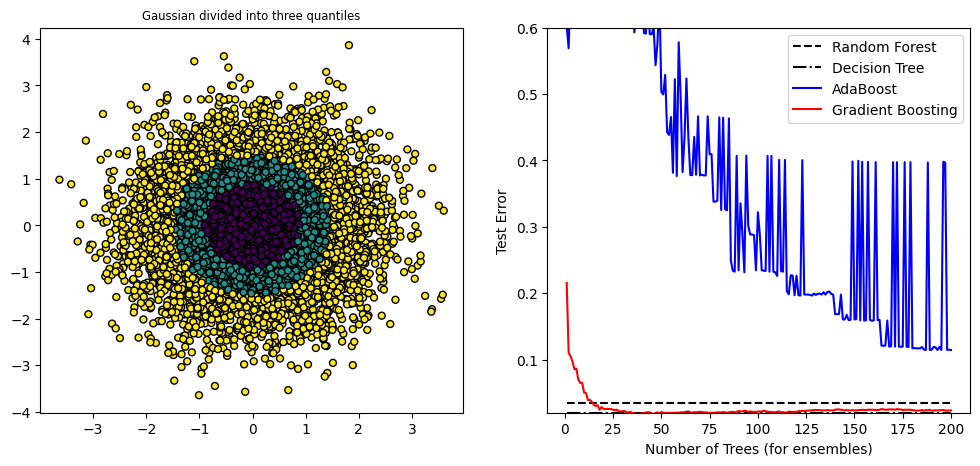

In [7]:
# Nous allons utiliser un ensemble de données 2D généré à partir d'une distribution gaussienne
X, y = make_gaussian_quantiles(n_samples=10000, n_features=2, n_classes=3, random_state=19)

# TODO 1 - Générer l'ensemble de données

split_percent = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_percent, random_state=42)

# TODO 2 - Définir les modèles et attribuer des valeurs à leurs paramètres (importants).
# Par exemple, le nombre de classificateurs faibles (n_estimators, le cas échéant) pour chaque modèle.


decision_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state=42)

# TODO 3 - Entraîner les modèles sur les ensembles de données

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)



# TODO 4 - Déterminer les valeurs prédites par les modèles sur les données de test et calculer **les erreurs** 
# (utilisez la fonction accuracy_score). Pour chaque modèle, vous allez calculer l’erreur à chaque itération 
# d'entraînement, c’est-à-dire chaque fois que le nombre de classificateurs faibles dans l’ensemble est augmenté 
# (si applicable). Pour cela, consultez la fonction staged_predict() dans la documentation des modèles.

# Attention ! Pour une meilleure visualisation des résultats, étant donné que l’arbre de décision et la forêt 
# aléatoire renvoient une seule valeur, afin de ne pas afficher un seul point, nous allons copier cette valeur 
# dans un vecteur de la longueur maximale correspondant au nombre maximum d’itérations d’entraînement effectué 
# par les modèles à ensembles.


y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_adaboost = adaboost.predict(X_test)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

adaboost_errors = []
gradient_boosting_errors = []
decision_tree_error = 1.0 - accuracy_score(y_test, y_pred_decision_tree)
random_forest_error = 1.0 - accuracy_score(y_test, y_pred_random_forest)


for y_pred in adaboost.staged_predict(X_test):
    error = 1.0 - accuracy_score(y_test, y_pred)
    adaboost_errors.append(error)


for y_pred in gradient_boosting.staged_predict(X_test):
    error = 1.0 - accuracy_score(y_test, y_pred)
    gradient_boosting_errors.append(error)



N = max(len(adaboost_errors),len(gradient_boosting_errors))
random_forest_errors = [random_forest_error] * N
decision_tree_errors = [decision_tree_error] * N


# TODO 5 - Faites varier le nombre d’estimateurs (et d’autres paramètres pertinents) des méthodes ensemblistes 
# et expliquez les résultats

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("Gaussian divided into three quantiles", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

plt.subplot(122)
plt.plot(range(1, len(random_forest_errors) + 1),
         random_forest_errors, c='black',
         linestyle='dashed', label='Random Forest')
plt.plot(range(1, len(decision_tree_errors) + 1),
         decision_tree_errors, c='black',
         linestyle='-.', label='Decision Tree')
plt.plot(range(1, len(adaboost_errors) + 1),
         adaboost_errors, c='blue',
         linestyle='-', label='AdaBoost')
plt.plot(range(1, len(gradient_boosting_errors) + 1),
         gradient_boosting_errors, c='red',
         linestyle='-', label='Gradient Boosting')
plt.legend()
plt.ylim(0.02, 0.6)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees (for ensembles)')

## 4. Notions théoriques sur la validation croisée (Cross-Validation)

Comme nous l'avons vu dans les laboratoires précédents, les ensembles de données doivent être divisés (aléatoirement) en au moins deux sous-ensembles : un pour l’**entraînement** et un pour le **test**. La raison de cette division est que nous voulons évaluer le comportement du modèle entraîné sur un ensemble de données **inconnu** (non utilisé pendant l'entraînement), afin d’estimer sa capacité de **généralisation** (comment il se comportera sur des données totalement nouvelles une fois mis en production).

Dans le cas où le modèle classe très bien les données d’entraînement mais fait beaucoup d’erreurs sur les données de test, cela indique clairement un problème de **surapprentissage** (overfitting). De plus, pour certains algorithmes, il est nécessaire de rechercher des **valeurs optimales des hyperparamètres**. Par exemple, combien de classificateurs sont suffisants dans une méthode d'ensemble pour atteindre une performance maximale ;). Si nous testons uniquement avec les deux sous-ensembles (entraînement et test), nous risquons d’obtenir un modèle surajusté, car nous ne serons pas certains d’avoir choisi les meilleurs hyperparamètres pour des données nouvelles. La solution consiste à diviser l’ensemble initial en **trois** sous-ensembles : entraînement, **validation** et test. Les modèles apprendront à partir de l’ensemble d'entraînement, les bons hyperparamètres seront recherchés à l’aide de l’ensemble de validation, et la capacité de généralisation sera testée avec l’ensemble de test.

Cependant, si nous voulons nous assurer que chaque ensemble de données est suffisamment grand pour être significatif, cela impliquerait de réduire considérablement la taille de l’ensemble d'entraînement (en équilibrant les tailles des ensembles de validation et de test). De plus, la répartition aléatoire des données dans les trois sous-ensembles peut introduire des **déséquilibres**, certaines classes étant mal représentées en fréquence (peu d'exemples dans un sous-ensemble par rapport à leur fréquence dans l'ensemble initial).

Une méthode qui atténue ces problèmes est la **validation croisée** (*cross-validation*). Concrètement, l’ensemble de données est d’abord divisé en deux parties. Une partie est conservée pour le test final, tandis que l’autre partie (généralement plus grande) est utilisée pour l'entraînement et la validation. Cette fraction est ensuite divisée en **k plis** (**k-folds**). À chaque itération, $k-1$ sous-ensembles sont utilisés pour l'entraînement et le $k$-ième pour la validation. Ce processus renvoie la **moyenne de la métrique souhaitée** pour chaque étape d’entraînement.

![Cross-Validation](./grid_search_cross_validation.png "Exemple de Cross-Validation")


## 5. Exigences (Partie II) [2p]
Modifiez l’implémentation de la [Partie I](#cerinte-1) afin d’utiliser la **validation croisée k-fold**. Essayez avec différentes valeurs de $k$. Il est recommandé d’utiliser la fonction _cross_val_score_.

Attention ! Il suffit de calculer le score de validation croisée sur le modèle « final » dans le cas des méthodes d’ensemble (il n’est pas nécessaire d’utiliser staged_predict). Par conséquent, vous comparerez uniquement les valeurs de _précision_ entre les modèles.


In [9]:
# Nous allons utiliser un jeu de données 2D généré à partir d'une distribution gaussienne
X, y = make_gaussian_quantiles(n_samples=10000, n_features=20, n_classes=3, random_state=19)

# TODO 6 - Définissez les modèles pour lesquels vous souhaitez appliquer la validation croisée (avec les hyperparamètres souhaités)
decision_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.15, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# TODO 7 - Appliquez la validation croisée à chacun des modèles définis ci-dessus. Affichez la moyenne (mean) et l'écart type (std)
# des scores pour chaque valeur de k choisie

models = [decision_tree, random_forest, adaboost, gradient_boosting]
model_names = ['decision_tree', 'random_forest', 'adaboost', 'gradient_boosting']

# Appliquer la validation croisée et afficher les résultats
for i in range(4):
    scores = cross_val_score(models[i], X_train, y_train, cv=5)  # Validation croisée avec 5 plis
    print(f"Model: {model_names[i]}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard dev: {scores.std()}")
    print()

# TODO 8 - Variez le nombre de caractéristiques (features) et le nombre de classes dans le jeu de données et expliquez les résultats.


Model: decision_tree
Mean score: 0.976625
Standard dev: 0.002113941815660979

Model: random_forest
Mean score: 0.961875
Standard dev: 0.0062374874749373385

Model: adaboost
Mean score: 0.857
Standard dev: 0.015955994171470467

Model: gradient_boosting
Mean score: 0.975125
Standard dev: 0.0013346347815039248



## Références
[1] Freund, Yoav, and Robert E. Schapire. "A desicion-theoretic generalization of on-line learning and an application to boosting." In European conference on computational learning theory, pp. 23-37. Springer, Berlin, Heidelberg, 1995.

[2] Freund, Yoav, and Robert E. Schapire. "Experiments with a new boosting algorithm." In icml, vol. 96, pp. 148-156. 1996.

## Ressources

* http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf
* https://scikit-learn.org/stable/modules/cross_validation.html